In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import seaborn as sns

In [3]:
#let's ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#let's load the data
housedata=pd.read_csv('house.csv')
housedata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#let's remove some unwanted columns
housedata.drop(['id','date'],axis=1,inplace=True)

In [6]:
housedata.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
housedata.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
housedata.isnull().head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
housedata.isnull().sum()
#there is no null values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(15)
memory usage: 3.1 MB


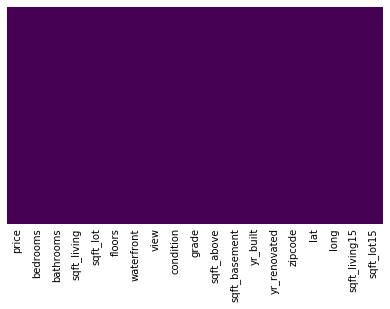

In [11]:
sns.heatmap(housedata.isnull(),cbar=False,yticklabels=False,cmap='viridis')
#there is no null vaues below image is clear

let's visualise some insights of data

In [12]:
housedata.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


Price is highly correlated with sq_living,sqft_above,grade
and mediuly correlated with bedrooms,bathrooms,sqbasement,sq_living15

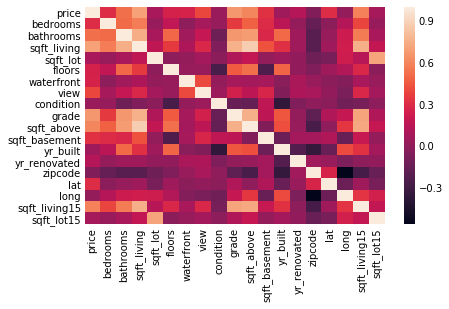

In [13]:
sns.heatmap(housedata.corr(),cmap='rocket',cbar=True,yticklabels=True)

In [14]:
housedata=pd.DataFrame(data=housedata[{'price','bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement','sqft_living15'}])
housedata.head()

,bathrooms,grade,sqft_above,sqft_living15,sqft_basement,price,sqft_living,bedrooms
0,1.00,7,1180,1340,0,221900,1180,3
1,2.25,7,2170,1690,400,538000,2570,3
2,1.00,6,770,2720,0,180000,770,2
3,3.00,7,1050,1360,910,604000,1960,4
4,2.00,8,1680,1800,0,510000,1680,3


In [15]:
housedata.corr()

,bathrooms,grade,sqft_above,sqft_living15,sqft_basement,price,sqft_living,bedrooms
bathrooms,1.000000,0.664983,0.685342,0.568634,0.283770,0.525138,0.754665,0.515884
grade,0.664983,1.000000,0.755923,0.713202,0.168392,0.667434,0.762704,0.356967
sqft_above,0.685342,0.755923,1.000000,0.731870,-0.051943,0.605567,0.876597,0.477600
sqft_living15,0.568634,0.713202,0.731870,1.000000,0.200355,0.585379,0.756420,0.391638
sqft_basement,0.283770,0.168392,-0.051943,0.200355,1.000000,0.323816,0.435043,0.303093
price,0.525138,0.667434,0.605567,0.585379,0.323816,1.000000,0.702035,0.308350
sqft_living,0.754665,0.762704,0.876597,0.756420,0.435043,0.702035,1.000000,0.576671
bedrooms,0.515884,0.356967,0.477600,0.391638,0.303093,0.308350,0.576671,1.000000


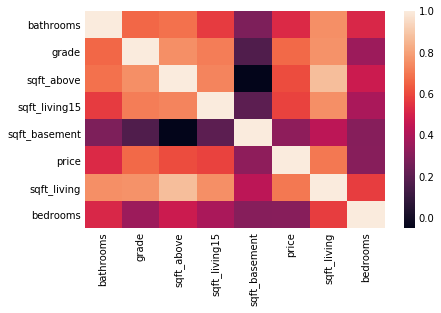

In [16]:
sns.heatmap(housedata.corr(),cmap='rocket',cbar=True,yticklabels=True)

let's analyse the sqft_living vs price

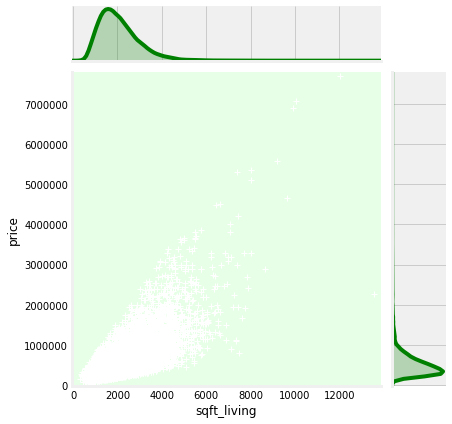

In [17]:
jn=sns.jointplot(x='sqft_living',y='price',kind='kde',data=housedata[(housedata['sqft_living']>0)],color='g')
jn.plot_joint(plt.scatter,c='w',s=30,linewidth=1,marker="+")

Text(0.5, 1, 'sqft_living vs price')

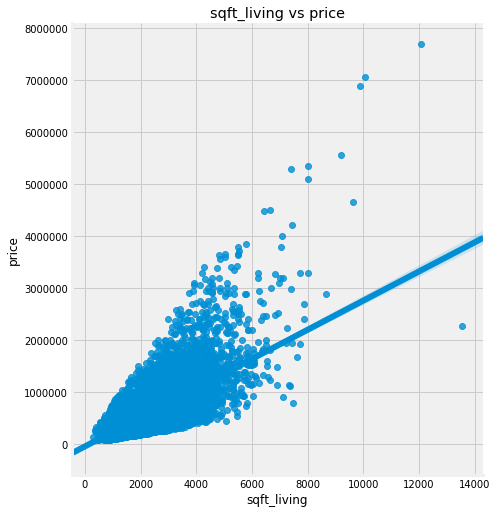

In [18]:
sns.lmplot(x='sqft_living',y='price',palette='viridis',height=7,data=housedata)
plt.title('sqft_living vs price')

Text(0.5, 1.0, 'distribution of sqft_living')

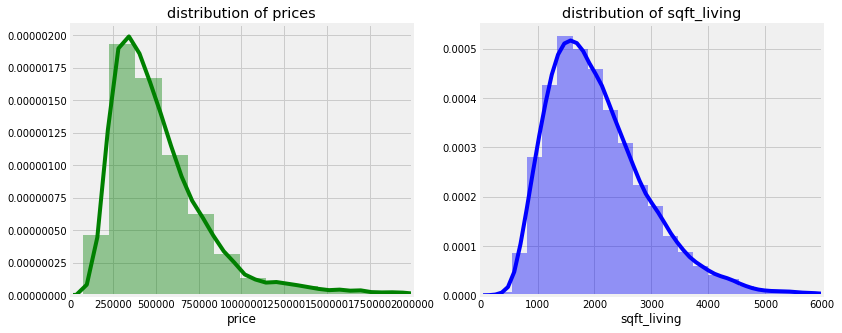

In [50]:
fig=plt.figure(figsize=(12,5))
axis=fig.add_subplot(121)
sns.distplot(housedata['price'],color='g')
plt.ylim(0,None)
plt.xlim(0,2000000)
axis.set_title('distribution of prices')

axis=fig.add_subplot(122)
sns.distplot(housedata['sqft_living'],color='b')
plt.ylim(0,None)
plt.xlim(0,6000)
axis.set_title('distribution of sqft_living')

(0, 6694.8)

<Figure size 72x360 with 0 Axes>

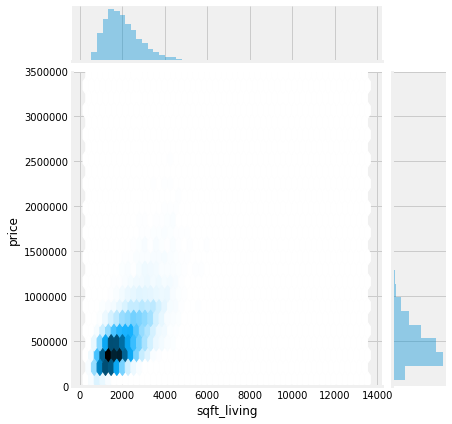

In [48]:
fig=plt.figure(figsize=(1,5))
sns.jointplot(x='sqft_living',y='price',kind='hex',data=housedata)
plt.ylim(0,3500000)
plt.xlim(0,None)

let's analyse price and grades

Text(0.5, 1, 'no of grades')

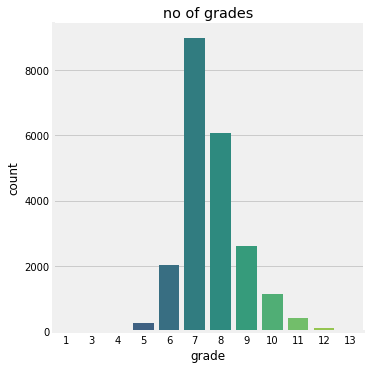

In [59]:
sns.catplot(x='grade',kind='count',palette='viridis',data=housedata)
plt.title('no of grades')

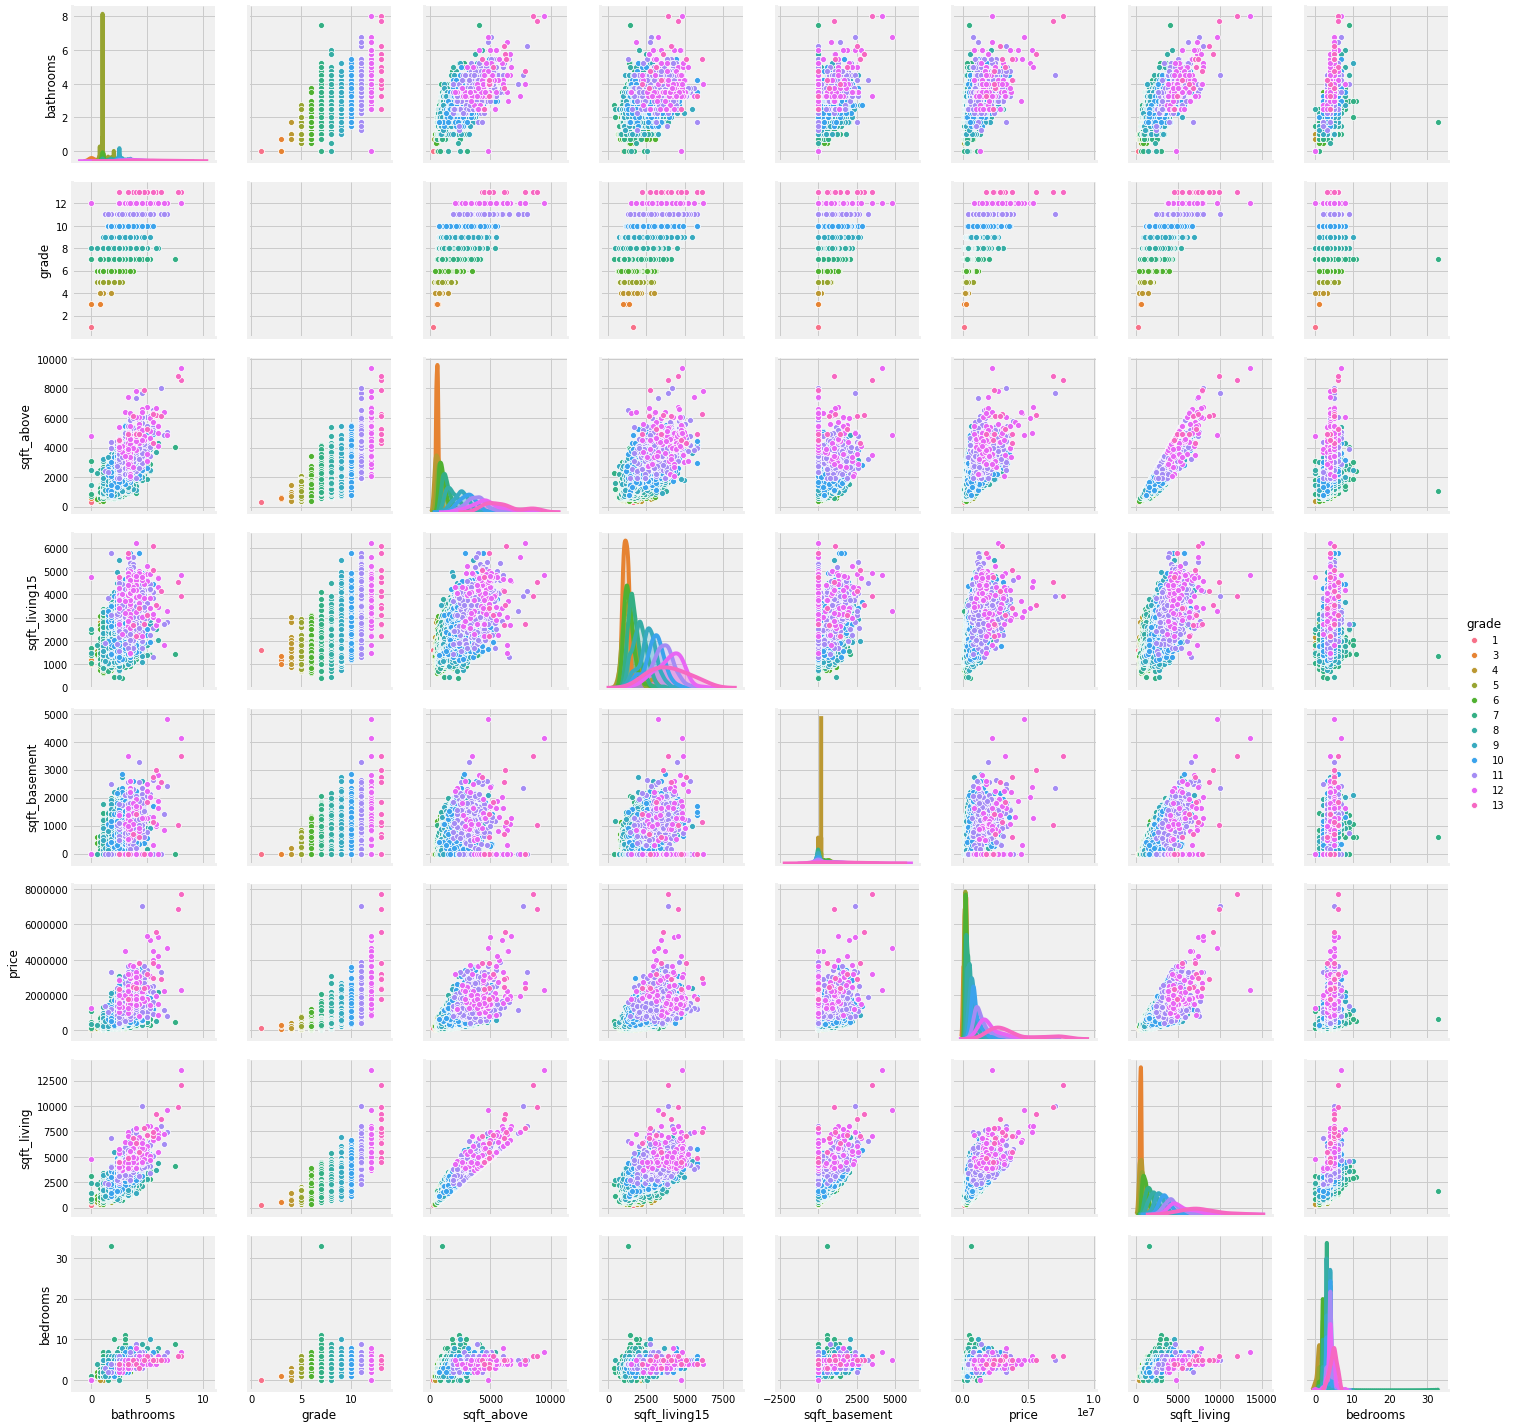

In [22]:
sns.pairplot(housedata,hue='grade')

Text(0.5, 1.0, 'grades vs price')

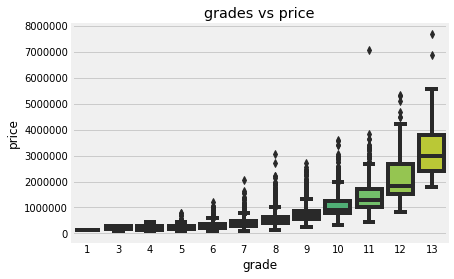

In [68]:
sns.boxplot(x='grade',y='price',palette='viridis',data=housedata)
#As grade increases price also increases
plt.title("grades vs price")

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [160]:
x=np.array(housedata[{'bedrooms','bathrooms','sqft_living','grade','sqft_above','sqft_basement','sqft_living15'}]).reshape(-1,7)
y=np.array(housedata['price']).reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)
slr=LinearRegression()
slr.fit(x_train,y_train)
y_pred=slr.predict(x_test)
print(r2_score(y_test,y_pred))

0.5594343026920603
